In [73]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

wine = load_wine()
wine_data = wine.data
wine_target = wine.target
df_wine = pd.DataFrame(data = wine_data, columns=wine.feature_names)

In [74]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [75]:
df_target = pd.DataFrame(data = wine_target, columns=['label'])
data = pd.concat([df_wine, df_target], axis=1)

In [76]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

In [77]:
X =data.loc[:, ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]
y =data.loc[:, 'label']

In [78]:
X = X.to_numpy()
y = y.to_numpy()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
scaled_X = ss.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,random_state=42)

In [79]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

sc = SGDClassifier(loss='hinge', max_iter=10, random_state=42)
sc.fit(X_train, y_train)

print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

1.0
0.9777777777777777


c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [80]:
sc.partial_fit(X_train, y_train)

print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

1.0
0.9777777777777777


In [81]:
sc = SGDClassifier(loss='hinge', random_state=42)

train_score = []
test_score = []

classes = np.unique(y_train)

In [82]:
for _ in range(0, 300):
    sc.partial_fit(X_train, y_train, classes=classes)
    
    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test, y_test))

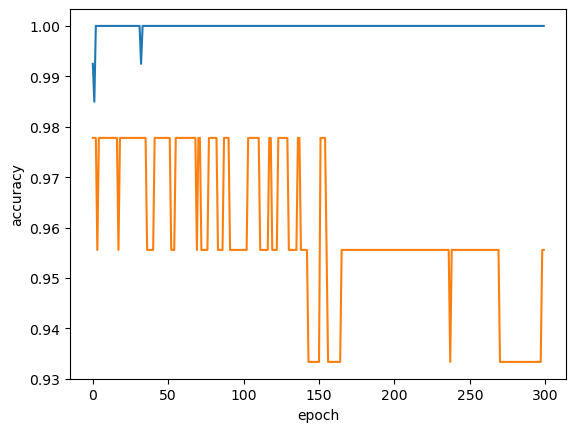

In [83]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()